# Observations for the night July 07th 2021 


https://harvard.zoom.us/rec/play/N7umVF8Rk3vWvW_O3jkaTinofB2WxW3QKz0fVai_K-qvAYLt37uMrvskOlnBiMEjduSeQVzWT7_DDYzc.IY7Pqjef82YlWmZE?continueMode=true&_x_zm_rtaid=BjQYrDaETYeYRUMw8NQgLw.1613559822570.c813d210d38e378b719cb4048493df5b&_x_zm_rhtaid=205


- work with Weakly_2021_26
- use jupyter kernel LSST
- requires the installation see https://github.com/stubbslab/PCWG-AuxTel/blob/main/setup_script.md
- requires to write in file {HOME}/notebooks/.user_setups


In [36]:
#! eups list -s

In [37]:
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib.colors import LogNorm

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.ticker                         # here's where the formatter is
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from astropy.io import fits

In [38]:
import lsst.daf.persistence as dafPersist
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend("lsst.display.firefly")

In [39]:
# correct for bug in stack in wl_2021_02
# %config IPCompleter.use_jedi=False

In [40]:
FLAG_SAVE_IMAGE=True

In [41]:
!ls /project/shared/auxTel/rerun/mfl/slurmRun

calexp	icExp  postISRCCD	     repositoryCfg.yaml  spectractorOutput
config	icSrc  processStar_metadata  schema


In [42]:
!ls /project/shared/auxTel

CALIB	   CALIB-OLD	 CALIB-RHL  icSrc    _parent.old  rerun
CALIB_OLD  calibrations  Fossil     _parent  ref_cats


In [43]:
!ls /project/shared/auxTel/rerun -l

total 16
drwxr-sr-x  3 57489 1363 4096 Mar 18  2020 adriansh
drwxr-sr-x  9 49813 1363 4096 Apr 23  2020 calib_construction
drwxrwsr-x 14 56749 1363 4096 Mar 17 16:59 cslage
drwxrwsrwx  3 49813 1363 4096 Feb 24 18:00 jneveu
drwxrwsr-x  3 49803 1363 4096 Mar 22 20:32 lauren
lrwxrwxrwx  1 49813 1363   25 Aug  7  2020 mfl -> /project/mfl/auxTelReruns
drwxr-sr-x  4 56509 1363 4096 Apr 24  2020 nmondrik
drwxr-sr-x  5 49813 1363 4096 Apr 23  2020 old_calibs
drwxr-sr-x 34 57167 1363 4096 Dec 15  2020 plazas
drwxr-sr-x  2 49813 1363 4096 Jan 29  2020 processCcdTesting
drwxrwsrwx  9 49813 1363 4096 May 16 20:28 quickLook
drwxr-sr-x  2 49813 1363 4096 Jul  7 01:07 quickLookExp
lrwxrwxrwx  1 37341 1363   25 Apr 30  2019 rhl -> /project/rhl/rerun/auxTel
drwxr-sr-x  3 48974 1363 4096 Feb 27  2020 swinbank
drwxr-sr-x  3 49813 1363 4096 May  5  2020 test
drwxrwsr-x  3 37341 1363 4096 May 10  2019 XXXXX


# Configuration

## Location and date

In [44]:
from lsst.rapid.analysis.nightReport import NightReporter
# data exist here
repoDir='/project/shared/auxTel'
# recommended but wrong
#repoDir='project/shared/auxTel/rerun/mfl/slurmRun'
dayObs="2021-07-07"
reporter=NightReporter(repoDir,dayObs)

Loaded data for seqNums 1 to 620


# Selection

In [45]:
DISPERSER_SEL="holo4_003"

# Information from reporter

In [46]:
print(reporter.getObservedObjects())

['HD  20293', 'HD  83745', 'HD  22515', 'HD   9639', 'HD  13885', 'HD 198047', 'HD 123413', 'HD 181558', 'UNKNOWN', '*  46 Psc', 'HD 194916', 'HD 109494', 'HD  22905', 'HD 142579', 'HD 162379', 'HD 184971', 'HD  29134', 'HD 172442', 'HD 217715', 'HD 179699', 'HD   4858', 'HD 126720', 'HD 129248', 'HD 122931', 'HD 123509', 'HD 156675', 'HD 222805', 'HD 153750', '* tau Pav', 'HD 137795', 'HD 122153', 'HD  26413', 'HD 141593', 'slew_icrs', 'HD 216163', 'HD 224265', 'HD 132223', 'HD 208264', 'HD 186878', 'HR5064', 'HD 122529', 'HD 200498', 'HD 169864', 'HD 176865', 'HD 133601', 'HD 207101', 'Spica', 'HD 121561', 'V* CN Hyi', 'HD   1375', '*  42 Psc', 'HD 122657', 'HD 149023', 'HD 142794', 'HD 147422', 'HD  15115', 'HD117637', 'HD 160617', 'HD 166679', 'HD    483', 'HD   5902', 'HD 191116', 'HD   8733', 'HD 192750', 'HD 222042', 'HD 196078', 'HD 180771', 'HD 123783', 'HD 157575', 'HD 209709', 'HD 123613A', 'HD 196401', 'HD 183050', 'HD 123380', 'HD    242', '*  14 Del', 'HD 221096', 'HD 123

In [47]:
#reporter.makePolarPlotForObjects()

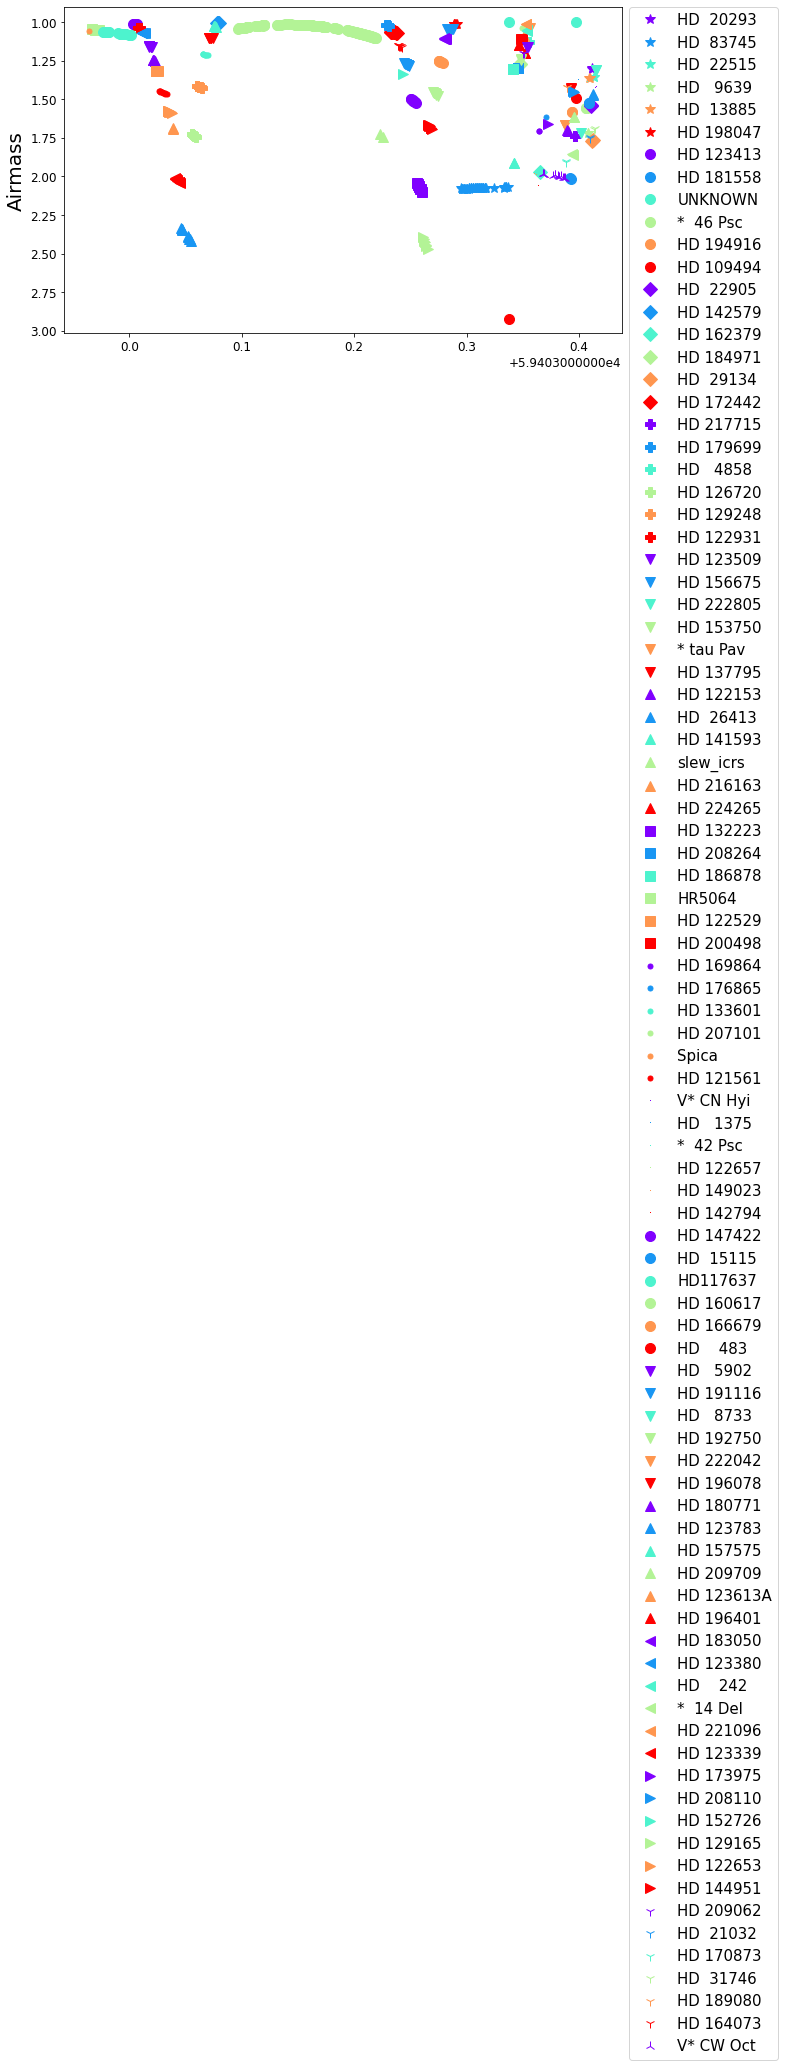

In [48]:
reporter.plotPerObjectAirMass()

In [49]:
reporter.printObsTable()

{seqNum} {imageType} {obj} {timeOfDay} {filt} {timeSinceLastExp} {expTime}
   1 bias      azel_target 21:36:34.162 RG610~empty                  0.0  0.00
   2 bias      azel_target 21:36:50.001 RG610~empty                 15.8  0.00
   3 bias      azel_target 21:36:54.499 RG610~empty                  4.5  0.00
   4 bias      azel_target 21:36:59.001 RG610~empty                  4.5  0.00
   5 bias      azel_target 21:37:03.500 RG610~empty                  4.5  0.00
   6 bias      azel_target 21:37:07.998 RG610~empty                  4.5  0.00
   7 bias      azel_target 21:37:12.501 RG610~empty                  4.5  0.00
   8 bias      azel_target 21:37:17.010 RG610~empty                  4.5  0.00
   9 bias      azel_target 21:37:21.518 RG610~empty                  4.5  0.00
  10 bias      azel_target 21:37:26.018 RG610~empty                  4.5  0.00
  11 bias      azel_target 21:37:30.513 RG610~empty                  4.5  0.00
  12 bias      azel_target 21:37:35.011 RG610~empty     

# Butler

## Configuration for Butler

In [50]:
#butler=dafPersist.Butler("/project/shared/auxTel")
butler=dafPersist.Butler(repoDir)

## Sequence selection

In [51]:
# wide scan
#all_myseq_holo=range(234,310)
# narrow scan
all_myseq_holo=range(317,365)
all_myseq=all_myseq_holo

In [52]:
seqNum=all_myseq_holo[0]

In [53]:
seqNum

317

## Display

In [54]:
display1=afwDisplay.getDisplay(frame=1,port=80,name='sylviedc_debug_2021_07_07',url=os.environ["FIREFLY_URL"])

In [55]:
raw=butler.get('raw',dayObs=dayObs,seqNum=seqNum)

In [56]:
display1.mtv(raw)

In [57]:
display1.getClient().display_url()

In [58]:
print(butler.queryMetadata('raw','seqNum',dayObs=dayObs))

[1, 2, 3, 5, 4, 6, 7, 10, 13, 9, 12, 8, 11, 16, 17, 18, 19, 14, 15, 25, 23, 22, 21, 24, 20, 28, 29, 31, 30, 26, 32, 27, 34, 39, 35, 36, 37, 38, 33, 41, 45, 43, 44, 40, 42, 50, 46, 48, 49, 47, 51, 52, 54, 53, 55, 57, 56, 58, 59, 60, 61, 62, 64, 63, 67, 68, 65, 66, 70, 69, 72, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 219, 218, 221, 220, 22

In [59]:
#exp=butler.get('quickLookExp',dayObs=dayObs,seqNum=seqNum)

## Meta Data

In [60]:
md=butler.get("raw_md",dayObs=dayObs,seqNum=seqNum)

In [61]:
md.toDict()

{'SIMPLE': True,
 'EXTEND': True,
 'COMMENT': ["  FITS (Flexible Image Transport System) format is defined in 'Astronomy",
  "  and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H",
  "= '        '",
  '---- Date, night and basic image information ----',
  "= '        '",
  '---- Telescope info, location, observer ----',
  "= '        '",
  '---- Pointing info, etc. ----',
  "= '        '",
  '---- TAN Projection ----',
  "= '        '",
  '---- Image-identifying used to build OBS-ID ----',
  "= '        '",
  '---- Test Stand information ----',
  "= '        '",
  '---- Information from Camera (Common block) ----',
  "= '        '",
  '---- Information from Camera ----',
  "= '        '",
  '---- Filter/grating information ----',
  "= '        '",
  '---- Exposure-related information ----',
  "= '        '",
  '---- Weather information ----',
  "= '        '",
  '---- Header information ----',
  "= '        '",
  '---- Checksums ----',
  '---- Information from Camera

# Start

In [62]:
plt.rcParams["axes.labelsize"] = 'large'
plt.rcParams['axes.titlesize'] = 'large'
plt.rcParams['xtick.labelsize']= 'large'
plt.rcParams['ytick.labelsize']= 'large'

In [63]:
all_my_raw_array=[]
all_my_header=[]
all_my_object=[]
all_my_seq=[]
all_my_grating=[]
all_my_filter=[]
all_my_date=[]


for seqNum in all_myseq:
    raw=butler.get('raw',dayObs=dayObs,seqNum=seqNum)
    md=butler.get("raw_md",dayObs=dayObs,seqNum=seqNum)
    
    header=md.toDict()
    
    #decode header
    
    obj_name=header['OBJECT']
    obj_name2 = ''.join(obj_name.split())
    grating=header['GRATING']
    obsid=header['OBSID']
    date=obsid.replace('AT_O_','') # remove pre-tag to get date only and seqnum
    filter_name=header['FILTER']
    filter_name2=filter_name.split("_")[0]   # cut empty_1 to empty
    
    # select only pre-selected disperser
    if grating == DISPERSER_SEL: 
        all_my_raw_array.append(np.copy(raw.image.array))
        all_my_header.append(header)
        all_my_object.append(obj_name2)
        all_my_seq.append(header['SEQNUM'])
        all_my_grating.append(grating)
        all_my_filter.append(filter_name2)
        all_my_date.append(date)

## Total number of images

In [64]:
NSEL=len(all_my_raw_array)

In [65]:
NSEL

48

# Plot

In [66]:
idx=0

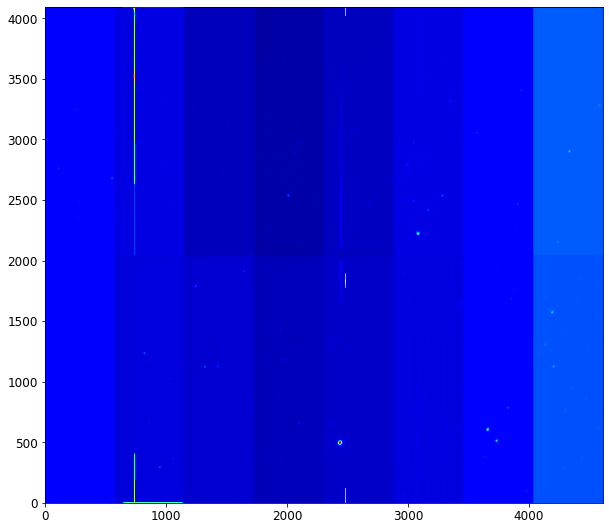

In [67]:
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
ax.imshow(all_my_raw_array[idx],origin='lower',cmap="jet",norm=LogNorm())
plt.show()

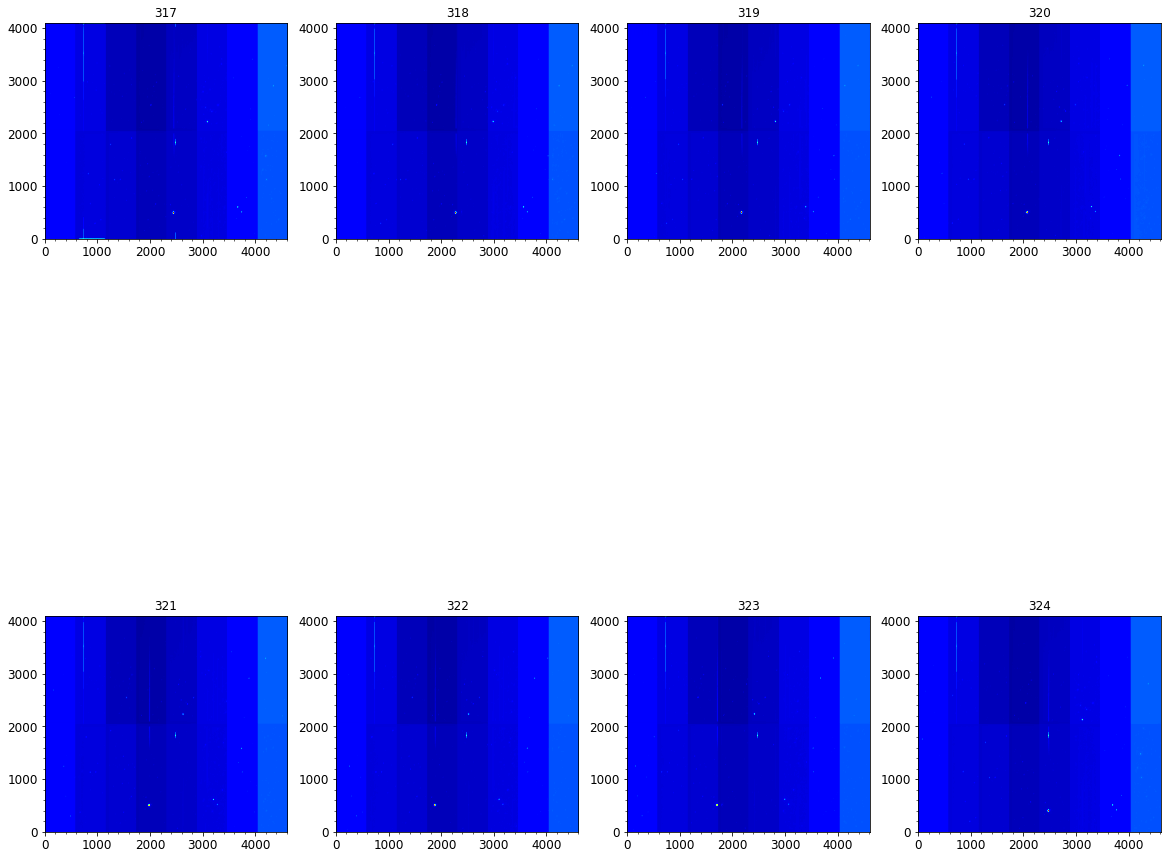

In [68]:

Ncol=4
Nrow=2
Ntot=Ncol*Nrow

fig = plt.figure(figsize=(20,20))

# loop on angle
for idx in np.arange(Ntot):
    if idx>=NSEL:
        break
        
    ax=fig.add_subplot(Nrow,Ncol,idx+1)
    ax.imshow(all_my_raw_array[idx],origin='lower',cmap="jet",norm=LogNorm())
    ax.set_title(all_myseq[idx]) 
    ax.minorticks_on()
    ax.set_aspect("equal")
    
    #ax2=ax.twiny()
    #ax2.imshow(all_my_raw_array[idx],origin='lower',cmap="jet",norm=LogNorm())
    #ax2.set_xlim(ax.get_xlim())
    #ax2.minorticks_on()
    
    #ax.tick_params(which='major', length=10, width=2, direction='inout')
    #ax.tick_params(which='minor', length=5, width=2, direction='inout')
    #ax.grid(which='both')



    #ax.set_aspect('equal')

    #x1, x2 = ax.get_xlim() 
    #y1, y2 = ax.get_ylim() 
plt.show()

In [69]:
#all_my_raw_array=[]
#all_my_header=[]
#all_my_object=[]
#all_my_seq=[]
#all_my_grating=[]
#all_my_filter=[]


In [70]:
if FLAG_SAVE_IMAGE:
  
    for idx in np.arange(NSEL):
        filename=all_my_grating[idx]+"_"+all_my_filter[idx]+"_"+all_my_object[idx]+"_"+all_my_date[idx]+".fits"
        print(filename)
    
        hdr = fits.Header()
    
        for key,value in all_my_header[idx].items():
            hdr[str(key)]=value
        
        hdu = fits.PrimaryHDU(data=all_my_raw_array[idx],header=hdr)  # with headers
        #hdu = fits.PrimaryHDU(data=all_my_raw_array[idx])
    
        hdul = fits.HDUList([hdu])
    
        hdul.writeto(filename,overwrite=True)
    
        

holo4_003_empty_HD160617_20210707_000317.fits
holo4_003_empty_HD160617_20210707_000318.fits
holo4_003_empty_HD160617_20210707_000319.fits
holo4_003_empty_HD160617_20210707_000320.fits
holo4_003_empty_HD160617_20210707_000321.fits
holo4_003_empty_HD160617_20210707_000322.fits
holo4_003_empty_HD160617_20210707_000323.fits
holo4_003_empty_HD160617_20210707_000324.fits
holo4_003_empty_HD160617_20210707_000325.fits
holo4_003_empty_HD160617_20210707_000326.fits
holo4_003_empty_HD160617_20210707_000327.fits
holo4_003_empty_HD160617_20210707_000328.fits
holo4_003_empty_HD160617_20210707_000329.fits
holo4_003_empty_HD160617_20210707_000330.fits
holo4_003_empty_HD160617_20210707_000331.fits
holo4_003_empty_HD160617_20210707_000332.fits
holo4_003_empty_HD160617_20210707_000333.fits
holo4_003_empty_HD160617_20210707_000334.fits
holo4_003_empty_HD160617_20210707_000335.fits
holo4_003_empty_HD160617_20210707_000336.fits
holo4_003_empty_HD160617_20210707_000337.fits
holo4_003_empty_HD160617_20210707_